<a href="https://colab.research.google.com/github/erikaguiracocha/Data-Visualization-2025/blob/main/PS4erikaguiracocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS4**
 1. may want to use some extra fancy stuff like advanced matplotlib or plotly
2. BUT even more important to have solid story (just with basic mpl); again: idea and story matter most and simplicity first
3. i’d say this is key ps; we already did plenty and you should have a good command, but yet we still have couple weeks to go so
you still can fix it up and or beef it up; i’ll go carefully through it and let you know where we stand

In [ ]:
import pandas as pd  #original crime data uploaded
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)
print("Original Crime Data:")
print(crime_data.head(30))  # Show 21 counties

Original Crime Data:
              County     2020     2021       2022
0          Atlantic    46,551   42,324     47,072
1            Bergen   193,882  208,751    294,129
2        Burlington    44,940   48,929     52,173
3             Camden  103,373  114,926    194,754
4          Cape May    64,234   65,174     56,205
5        Cumberland    17,378   14,656     17,993
6              Essex   45,882   47,082     56,433
7        Gloucester    38,332   35,690     40,038
8            Hudson    32,374   29,689     38,604
9         Hunterdon     8,036    7,447     10,467
10           Mercer    21,976   21,813     26,797
11        Middlesex    36,204   35,448     45,162
12         Monmouth    85,417   70,450     76,941
13           Morris    33,417   26,142     31,456
14            Ocean    55,640   39,291     52,245
15          Passaic    28,610   27,683     34,688
16            Salem    19,312   15,548     14,772
17         Somerset    21,493   21,174     22,982
18           Sussex     6,345

In [ ]:
# URL of the CSV file
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

# Try to read the file
try:
    # If the second row is the header, use header=1
    budget_data = pd.read_csv(url_budget_data, header=1)
    print("Original Budget Data:")
    print(budget_data.head(30))  # Display the first 30 rows

except Exception as e:
    print(f"There was an error loading the file: {e}")

Original Budget Data:
              County              2020              2021              2022
0          Atlantic     119,262,425.86    117,407,829.60    123,993,860.75
1            Bergen     427,518,344.81    448,124,550.75    471,782,982.68
2        Burlington     122,407,763.95    125,868,638.98    128,190,733.44
3            Camden     137,420,012.72    135,626,159.37    147,391,782.25
4          Cape May      48,629,849.27     52,207,062.40     54,103,285.95
5        Cumberland      35,045,613.87     36,259,361.36     37,329,195.20
6             Essex     350,382,509.60    464,878,127.99    381,983,364.75
7        Gloucester      67,519,873.43     65,845,717.39     79,816,171.41
8            Hudson     290,272,331.25    300,219,111.87    377,519,753.78
9         Hunterdon      28,100,764.97     29,438,131.72     31,540,757.26
10           Mercer      93,981,950.66    104,382,301.52     97,266,160.77
11        Middlesex     253,427,739.92    292,934,332.15    331,800,018.84
12 

In [7]:
# Load the population data
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county.csv'
population_data = pd.read_csv(url_population_data)

print("Original Population Data:")
print(population_data.head(30))  # Display the first 30 rows to check the structure


Original Population Data:
         County    2,020    2,021    2,022
0     Atlantic   274,190  274,956  275,382
1        Bergen  953,690  955,383  953,540
2   Burlington   461,682  464,479  466,101
3       Camden   523,122  524,093  524,649
4     Cape May    95,044   95,706   95,405
5   Cumberland   153,719  152,083  151,347
6        Essex   859,974  854,233  849,724
7    Gloucester  302,563  304,592  306,767
8       Hudson   721,879  703,448  702,381
9    Hunterdon   128,786  129,671  129,805
10      Mercer   386,466  382,172  380,779
11   Middlesex   861,408  862,364  861,094
12    Monmouth   642,836  646,517  644,228
13      Morris   508,439  510,613  511,219
14       Ocean   638,465  649,825  655,663
15      Passaic  523,439  518,376  513,634
16       Salem    64,841   65,045   65,157
17     Somerset  344,754  346,498  347,047
18      Sussex   143,915  145,721  145,575
19       Union   573,660  572,833  570,417
20      Warren   109,520  110,567  110,903


In [16]:
# Load the unemployment rate data from the URL
url = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/unemployment%20rate%20by%20county.csv'
unemployment_data = pd.read_csv(url)

# Display the column names to confirm the structure
print("Column Names:")
print(unemployment_data.columns)

# Display the first few rows to check the data
print("\nFirst Few Rows of the Dataset:")
print(unemployment_data.head())

# Filter the dataset for the years 2020 to 2022 and display it
unemployment_data_filtered = unemployment_data[['County', '2020', '2021', '2022']]
print("\nFiltered Data (County and Years 2020-2022):")
print(unemployment_data_filtered)


Column Names:
Index(['County', '2020', '2021', '2022'], dtype='object')

First Few Rows of the Dataset:
        County  2020  2021  2022
0    Atlantic   17.1   9.9   5.4
1       Bergen   9.2   6.3   3.5
2  Burlington    7.9   5.7   3.5
3      Camden    9.7   7.1   4.2
4    Cape May   13.7   9.3   6.8

Filtered Data (County and Years 2020-2022):
         County  2020  2021  2022
0     Atlantic   17.1   9.9   5.4
1        Bergen   9.2   6.3   3.5
2   Burlington    7.9   5.7   3.5
3       Camden    9.7   7.1   4.2
4     Cape May   13.7   9.3   6.8
5   Cumberland   10.4   8.1   5.3
6        Essex   11.2   8.3   4.7
7    Gloucester   8.9   6.4   3.8
8       Hudson   10.2   7.1   3.8
9    Hunterdon    6.9   4.9   3.0
10      Mercer    7.2   5.5   3.3
11   Middlesex    8.5   6.1   3.5
12    Monmouth    8.5   5.9   3.5
13      Morris    7.5   5.3   3.2
14       Ocean    9.1   6.3   3.9
15      Passaic  12.1   8.7   4.8
16       Salem    9.2   7.7   4.8
17     Somerset   7.5   5.4   3.2
18     

#**Scatter plot - Crime vs Budgets 2020 - 2022 - New Jersey**

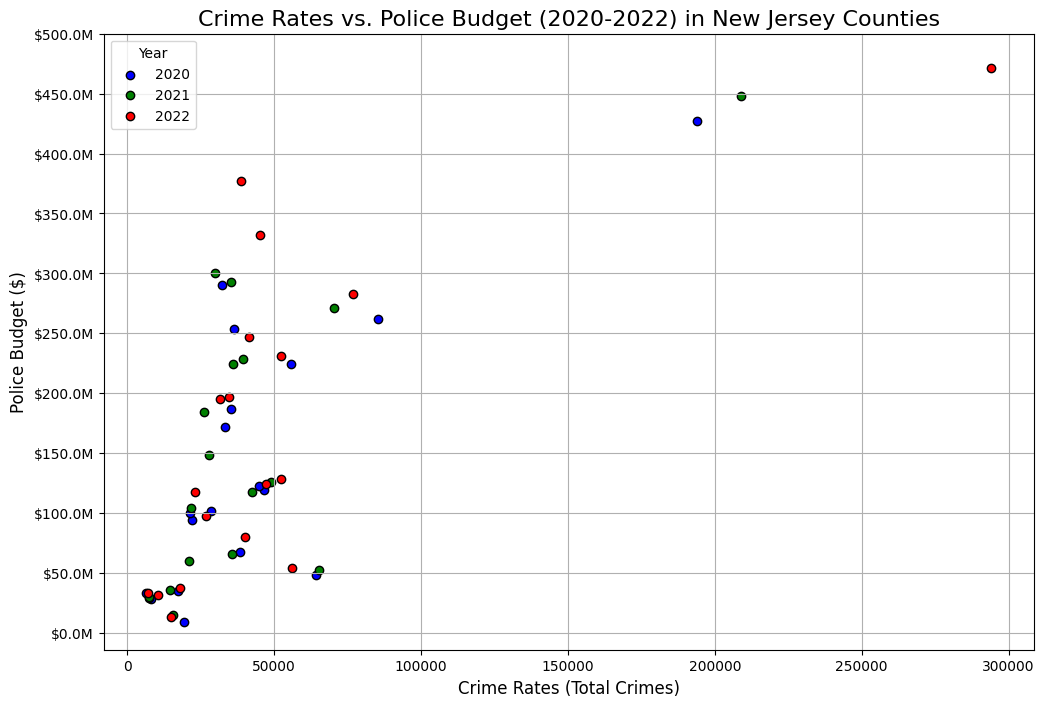

In [ ]:
import pandas as pd
import numpy as np

# Load the crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Load the budget data
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Filter out the 'Total New Jersey' row as it is not relevant for county-level analysis
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Convert crime data values to integers (remove commas)
crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
crime_data['2022'] = crime_data['2022'].replace({',': ''}, regex=True).astype(int)

# Convert budget data values to floats (remove commas)
budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)
budget_data['2021'] = budget_data['2021'].replace({',': ''}, regex=True).astype(float)
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Merge crime and budget data for the years 2020, 2021, and 2022
merged_data_2020 = pd.merge(crime_data[['County', '2020']], budget_data[['County', '2020']], on='County', suffixes=('_Crime', '_Budget'))
merged_data_2021 = pd.merge(crime_data[['County', '2021']], budget_data[['County', '2021']], on='County', suffixes=('_Crime', '_Budget'))
merged_data_2022 = pd.merge(crime_data[['County', '2022']], budget_data[['County', '2022']], on='County', suffixes=('_Crime', '_Budget'))

# Create a scatter plot for 2020, 2021, and 2022
plt.figure(figsize=(12, 8))

# Plot for 2020
plt.scatter(merged_data_2020['2020_Crime'], merged_data_2020['2020_Budget'], color='blue', label='2020', edgecolor='black')

# Plot for 2021
plt.scatter(merged_data_2021['2021_Crime'], merged_data_2021['2021_Budget'], color='green', label='2021', edgecolor='black')

# Plot for 2022
plt.scatter(merged_data_2022['2022_Crime'], merged_data_2022['2022_Budget'], color='red', label='2022', edgecolor='black')

# Add labels and title
plt.title('Crime Rates vs. Police Budget (2020-2022) in New Jersey Counties', fontsize=16)
plt.xlabel('Crime Rates (Total Crimes)', fontsize=12)
plt.ylabel('Police Budget ($)', fontsize=12)

# Add a legend to distinguish between the years
plt.legend(title='Year')

# Set Y-axis ticks to show ranges for the police budget (in increments of $50 million)
y_ticks = np.arange(0, max(merged_data_2022['2022_Budget']) + 50000000, 50000000)
plt.yticks(y_ticks, [f'${x/1e6:.1f}M' for x in y_ticks])

# Show grid and the plot
plt.grid(True)
plt.show()


**Interpretation**

**Outliers in Crime Rates and Police Budgets:**
**Bergen:** With consistently high crime rates and a large police budget, Bergen stands out as an outlier with both high crime and a high police budget, particularly in 2022. The crime rate and budget are much higher compared to other counties.

**Camden:** Camden also stands out with a notably high crime rate in 2022, accompanied by a significant increase in the police budget. This shows that while crime increased, Camden is allocating more resources to combat it.

**Essex:** Essex has a very high police budget, especially in 2021, but the crime rates are relatively high as well. Essex stands out due to the large gap between the crime rate and the police budget.

**Salem:** Salem is an outlier on the lower end with a significantly lower budget and crime rate. Despite a lower budget, its crime rates are not proportionally high, indicating potential underfunding for crime control in a low-crime area.

**Cape May and Hunterdon:** These counties are outliers in the opposite direction. Both have low crime rates and low police budgets. Despite having relatively low crime, their smaller budgets may suggest that the resources allocated are not sufficient to handle even minor crime spikes.

#**Bar chart of Average Crimes and Police Budgets 2020 - 2022**

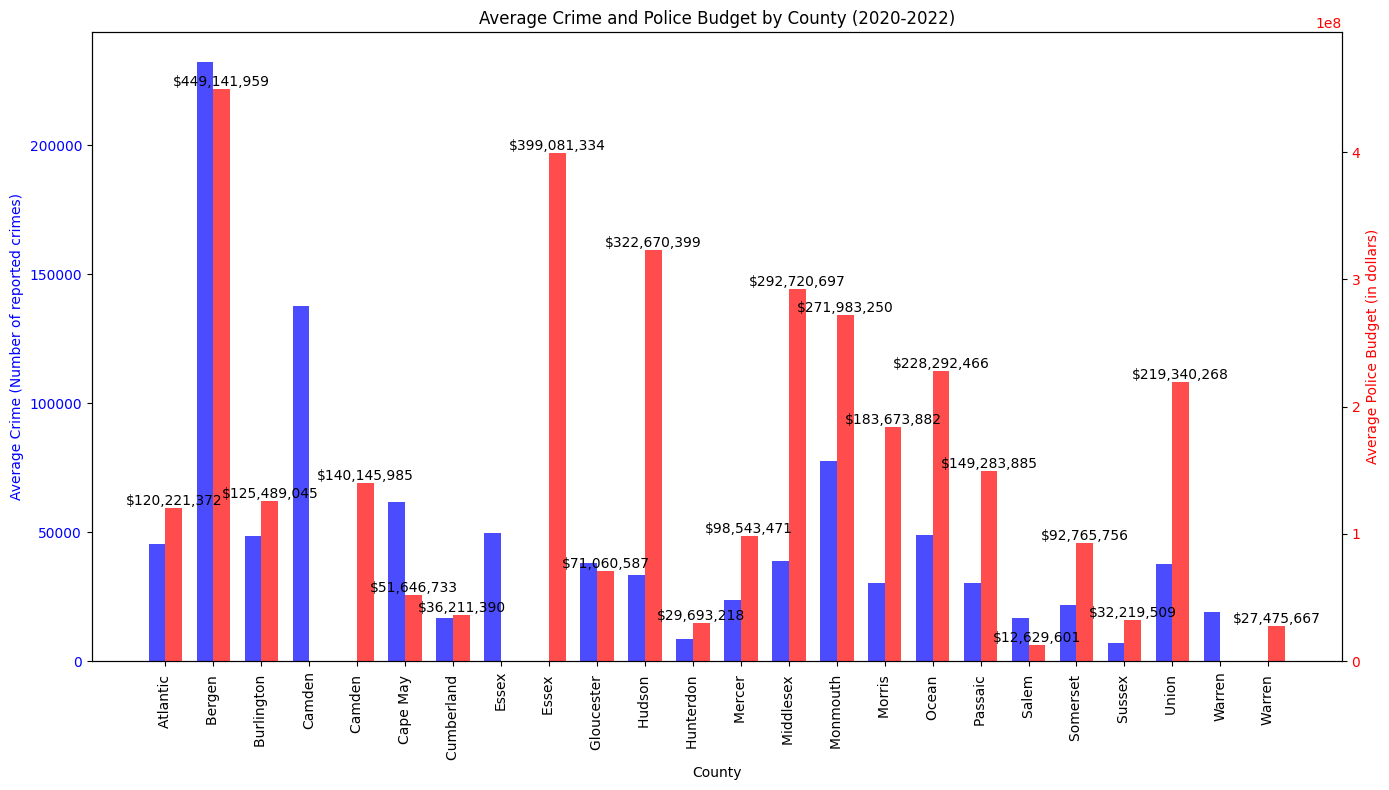

In [ ]:
# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Remove the "Total New Jersey" row from the crime data
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']

# Clean crime data (convert values to numeric for 2020, 2021, and 2022)
crime_data['2020'] = crime_data['2020'].str.replace(',', '').astype(float)
crime_data['2021'] = crime_data['2021'].str.replace(',', '').astype(float)
crime_data['2022'] = crime_data['2022'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Remove the "Total New Jersey" row from the budget data
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean budget data (convert values to numeric for 2020, 2021, and 2022)
budget_data['2020'] = budget_data['2020'].str.replace(',', '').astype(float)
budget_data['2021'] = budget_data['2021'].str.replace(',', '').astype(float)
budget_data['2022'] = budget_data['2022'].str.replace(',', '').astype(float)

# Calculate the average for Crime and Police Budget across the years 2020, 2021, and 2022
crime_data['Average Crime'] = crime_data[['2020', '2021', '2022']].mean(axis=1)
budget_data['Average Budget'] = budget_data[['2020', '2021', '2022']].mean(axis=1)

# Merge the two datasets (crime and budget) into one DataFrame using the 'County' column
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Create figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define the bar width
bar_width = 0.35

# Define the positions of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for average crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['Average Crime'], bar_width, color='blue', label='Average Crime', alpha=0.7)

# Labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Average Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis for the police budget (right side)
ax2 = ax1.twinx()

# Bar chart for average police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['Average Budget'], bar_width, color='red', label='Average Police Budget', alpha=0.7)

# Labels for the right y-axis
ax2.set_ylabel('Average Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust the range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['Average Budget'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Average Crime and Police Budget by County (2020-2022)')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


 **Interpretation of the Average Crime and Police Budget (2020-2022):**

The graph presents the average crime rates and average police budgets for the counties in New Jersey from 2020 to 2022. For each county, the average crime rate (the total number of reported crimes across the three years) and the average police budget (the total budget allocated for law enforcement over the same period) are visualized in two separate bar charts.

By averaging the values across the three years, this graph allows us to understand the general trends in crime and budget allocation without being affected by fluctuations in any single year. The blue bars represent the average number of crimes, and the red bars represent the average police budget.

**Several counties stand out as outliers in this analysis:**

Essex County stands out with a high average crime rate compared to the other counties. Its crime levels are much higher, possibly indicating more urbanized areas with larger populations.

Hudson County also shows a significantly high police budget, which seems disproportionate relative to its average crime rate. This could indicate either a focus on resource allocation towards law enforcement or larger infrastructure and needs in urban regions.

On the other hand, Hunterdon and Salem Counties have notably low crime rates and lower budgets, indicating that these counties may have fewer law enforcement needs compared to others in New Jersey.

This graph clearly illustrates the variation in both crime rates and police budgets across counties, with certain outliers where either the crime rate or police budget is disproportionately high or low.

This average approach provides a better overall picture of crime and budget trends, filtering out the noise of annual fluctuations and offering a clearer understanding of resource allocation relative to crime. It also highlights the counties where crime or budget distribution significantly deviates from the norm, which could be worth further investigation in terms of policy or resource allocation.

#**Scatter Plot of Average Crime Rates and Police Budgets (2020 - 2022) by county with Max and Min Values**

In [ ]:
import pandas as pd
import plotly.express as px

# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data['2020'] = crime_data['2020'].str.replace(',', '').astype(float)
crime_data['2021'] = crime_data['2021'].str.replace(',', '').astype(float)
crime_data['2022'] = crime_data['2022'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']
budget_data['2020'] = budget_data['2020'].str.replace(',', '').astype(float)
budget_data['2021'] = budget_data['2021'].str.replace(',', '').astype(float)
budget_data['2022'] = budget_data['2022'].str.replace(',', '').astype(float)

# Calculate the average crime and budget data for each county over 2020-2022
crime_data['Average Crime'] = crime_data[['2020', '2021', '2022']].mean(axis=1)
budget_data['Average Budget'] = budget_data[['2020', '2021', '2022']].mean(axis=1)

# Merge the crime and budget data into one DataFrame using 'County'
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Create an interactive scatter plot using Plotly
fig = px.scatter(merged_data,
                 x='Average Crime',
                 y='Average Budget',
                 color='County',
                 hover_data=['County', 'Average Crime', 'Average Budget'],
                 labels={'Average Crime': 'Average Crime (2020-2022)',
                         'Average Budget': 'Average Police Budget (2020-2022)'},
                 title='Average Crime vs. Average Police Budget (2020-2022) by County')

# Show plot
fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=1, color='black')))
fig.update_layout(showlegend=True)

fig.show()


**Interpretation**: The scatter plot highlights the relationship between average crime rates and average police budgets in New Jersey counties from 2020 to 2022. While most counties show a positive correlation between higher crime rates and higher police budgets, several outliers stand out. Camden is a notable outlier with a high average crime rate but a relatively lower average police budget compared to other counties. This suggests a potential gap in resource allocation, as the county may be underfunded relative to the severity of its crime. On the other hand, Essex County also exhibits high crime rates but has a proportionately larger budget, which appears to be more aligned with its needs. Middlesex stands out as another interesting case, with a relatively lower crime rate but a higher-than-expected police budget, raising questions about the efficiency of resource distribution. These outliers indicate that crime rates alone do not fully dictate police funding, and other factors, such as political, social, or economic influences, might be at play in determining budget allocations.

#**Heatmap - Correlation between crime, budget and population**

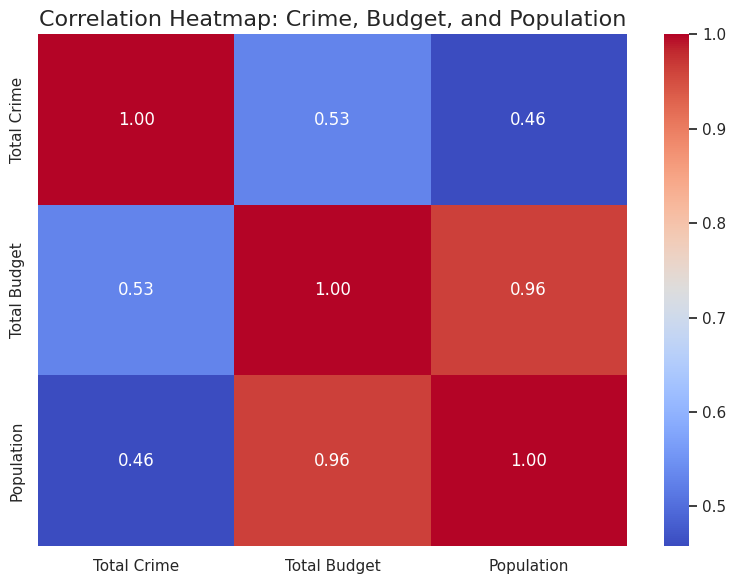

In [17]:
# Load the crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Load the budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Load the population data
population_data = pd.read_csv(url_population_data)

# Strip any extra spaces from column names
population_data.columns = population_data.columns.str.strip()

# Clean population data by removing commas and converting to integers
population_data['2,020'] = population_data['2,020'].replace({',': ''}, regex=True).astype(int)
population_data['2,021'] = population_data['2,021'].replace({',': ''}, regex=True).astype(int)
population_data['2,022'] = population_data['2,022'].replace({',': ''}, regex=True).astype(int)

# Create 'Population' column by averaging the 2020, 2021, and 2022 population values
population_data['Population'] = population_data[['2,020', '2,021', '2,022']].mean(axis=1)

# Clean and convert the crime columns (remove commas and convert to integers)
crime_data['2020'] = crime_data['2020'].replace({',': ''}, regex=True).astype(int)
crime_data['2021'] = crime_data['2021'].replace({',': ''}, regex=True).astype(int)
crime_data['2022'] = crime_data['2022'].replace({',': ''}, regex=True).astype(int)

# Clean and convert the budget columns (remove commas and convert to floats)
budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)
budget_data['2021'] = budget_data['2021'].replace({',': ''}, regex=True).astype(float)
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Create 'Total Crime' and 'Total Budget' columns by summing the respective years
crime_data['Total Crime'] = crime_data['2020'] + crime_data['2021'] + crime_data['2022']
budget_data['Total Budget'] = budget_data['2020'] + budget_data['2021'] + budget_data['2022']

# Merge the three datasets: crime, budget, and population
merged_data = pd.merge(crime_data[['County', 'Total Crime']], budget_data[['County', 'Total Budget']], on='County')
merged_data = pd.merge(merged_data, population_data[['County', 'Population']], on='County')

# Create a correlation matrix between 'Total Crime', 'Total Budget', and 'Population'
correlation_matrix = merged_data[['Total Crime', 'Total Budget', 'Population']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title and show the plot
plt.title('Correlation Heatmap: Crime, Budget, and Population', fontsize=16)
plt.tight_layout()
plt.show()


**Interpretation:** Based on the heatmap, the correlation between Total Crime and Total Budget shows a strong positive correlation of 0.53. This indicates that as the total crime rates in counties increase, their police budgets also tend to increase significantly. This makes sense because higher crime rates often lead to greater spending on law enforcement and crime prevention.

The correlation between Total Crime and Population is 0.46, suggesting that there is a moderately strong relationship between the size of a county's population and its crime rate. Larger counties with more people tend to experience higher crime rates.

Finally, the correlation between Total Budget and Population is 0.96, which implies a very strong positive relationship between the population size and the police budget. Larger populations require more resources for law enforcement, thus leading to higher budgets. Overall, the correlations in the heatmap show that bigger, more populous counties often face higher crime rates and require more funding for police services, highlighting the interconnectedness of crime, budget, and population size in the counties of New Jersey.

#**Comparison between Averages of Crime and Unemployment rates 2020 - 2022**

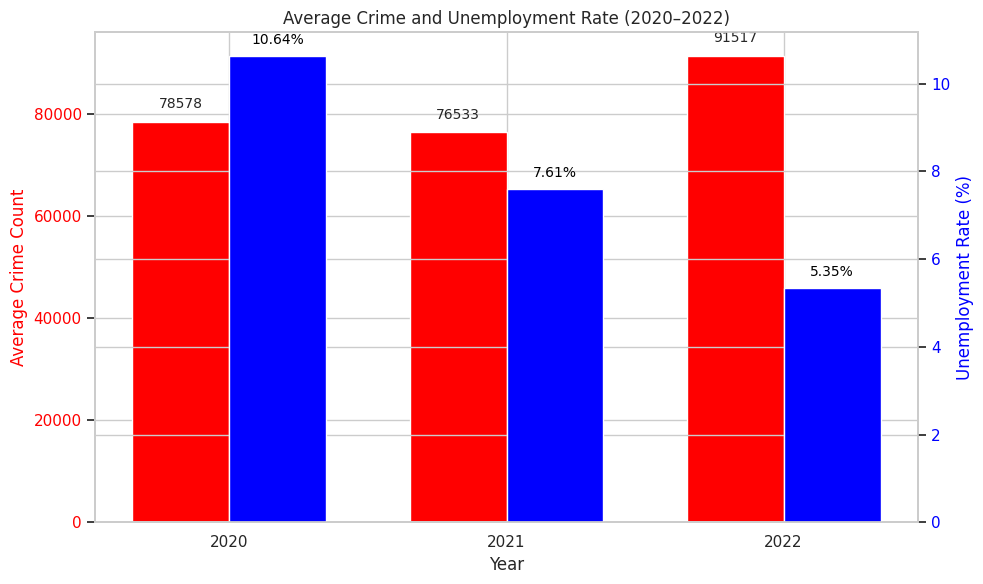

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Crime and Unemployment average values
crime_avg = {
    '2020': 78578.43,
    '2021': 76532.52,
    '2022': 91517.14
}

unemployment_avg = {
    '2020': 10.64,
    '2021': 7.61,
    '2022': 5.35
}

years = list(crime_avg.keys())
crime_values = list(crime_avg.values())
unemployment_values = list(unemployment_avg.values())

x = range(len(years))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot crime as red bars
bars1 = ax1.bar([i - width/2 for i in x], crime_values, width, color='red')
ax1.set_ylabel('Average Crime Count', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_xlabel('Year')
ax1.set_title('Average Crime and Unemployment Rate (2020–2022)')

# Annotate crime bars
for i, v in enumerate(crime_values):
    ax1.text(i - width/2, v + 2000, f'{v:.0f}', ha='center', va='bottom', fontsize=10)

# Plot unemployment as blue bars on a second axis
ax2 = ax1.twinx()
bars2 = ax2.bar([i + width/2 for i in x], unemployment_values, width, color='blue')
ax2.set_ylabel('Unemployment Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Annotate unemployment bars
for i, v in enumerate(unemployment_values):
    ax2.text(i + width/2, v + 0.2, f'{v:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Removed the legend

plt.tight_layout()
plt.show()


**Interpretation:** The bar chart shows the average crime counts and unemployment rates in New Jersey from 2020 to 2022. In 2020, unemployment was at its highest (10.64%) and crime levels were moderate (78,578 crimes on average). In 2021, unemployment decreased to 7.61%, and crime also slightly decreased to 76,533. However, in 2022, while unemployment dropped further to 5.35%, crime increased significantly to 91,517. This indicates that although unemployment rates have been going down over the three years, crime has not followed a consistent downward trend. In fact, crime rose sharply in 2022 even as more people were employed. Therefore, we can say that crime has increased in recent years despite falling unemployment rates, suggesting that other social or economic factors may be influencing criminal activity.

References: ChatGPT to create visualizations